In [1]:
import pandas as pd
import numpy as np

gdp = pd.read_csv('data/gdp.csv',header=0).dropna()
exchange_rate = pd.read_csv('data/exchange_rate.csv',header=0).dropna()
gdp_quarter = gdp.groupby('quarter').mean()

def discard_date(string):
    splits = string.split('/')
    year = splits[2]
    month = splits[1]
    half_year = 'H1' 
    
    if(int(year) <= 20):
        year = '20' + str(year) 
    else:
        year = '19' + str(year)
    
    if( int(month) > 6):
        half_year = 'H2'
        
    return year + '-' + half_year

exchange_rate['date'] = exchange_rate['date'].apply(discard_date)
exchange_rate = exchange_rate.groupby('date').mean()
exchange_rate.index.names =['half_year']
exchange_rate = exchange_rate.rename(columns={'value':'exchange_rate'})

def calc_exchange_rate_growth(exc_rate):
    growth = []
    growth.append(np.nan)
    for i in range(len(exc_rate)):
        if(i  < len(exc_rate) - 1):
            delta = exc_rate[i+1] - exc_rate[i]
            percentage = (delta / exc_rate[i]) * 100
            growth.append(percentage)
        
    return np.array(growth)

def discard_me(string):
    splits = string.split('-')
    year = splits[0]
    quartile = splits[1]
    half_year = 'H1'
    
    if(str(quartile) == 'Q3' or str(quartile) == 'Q4'):
        half_year = 'H2'
    
    return year + '-' + half_year

gdp['quarter'] = gdp['quarter'].apply(discard_me)
gdp = gdp.groupby('quarter').mean()
gdp.index.names =['half_year']
gdp= gdp.rename(columns={'value':'GDP'})

print(exchange_rate, gdp)

           exchange_rate
half_year               
1991-H1         1.754376
1991-H2         1.697900
1992-H1         1.640049
1992-H2         1.615250
1993-H1         1.630887
1993-H2         1.597829
1994-H1         1.567529
1994-H2         1.485443
1995-H1         1.418135
1995-H2         1.414817
1996-H1         1.410565
1996-H2         1.408057
1997-H1         1.427177
1997-H2         1.541633
1998-H1         1.656031
1998-H2         1.684598
1999-H1         1.707627
1999-H2         1.680994
2000-H1         1.709971
2000-H2         1.738769
2001-H1         1.782770
2001-H2         1.801181
2002-H1         1.817832
2002-H2         1.762500
2003-H1         1.746404
2003-H2         1.736794
2004-H1         1.698353
2004-H2         1.680791
2005-H1         1.646894
2005-H2         1.680825
2006-H1         1.607322
2006-H2         1.569253
2007-H1         1.528190
2007-H2         1.484900
2008-H1         1.386207
2008-H2         1.441219
2009-H1         1.491980
2009-H2         1.415859


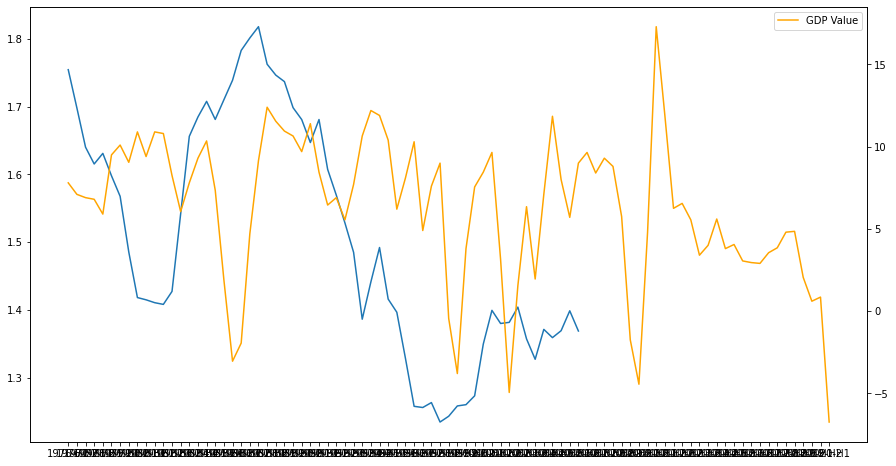

In [2]:
import matplotlib.pyplot as plt

#plt.plot(exchange_rate['value'])
#plt.show()

fig, ax= plt.subplots(figsize=(15,8))
ax.plot(exchange_rate['exchange_rate'], label='Exchange Rate')

ax2 = ax.twinx()
ax2.plot(gdp['GDP'], color='orange', label='GDP Value')

plt.legend()
plt.show()

               exchange_rate       GDP  exc_growth
exchange_rate       1.000000  0.049897    0.080765
GDP                 0.049897  1.000000   -0.411303
exc_growth          0.080765 -0.411303    1.000000


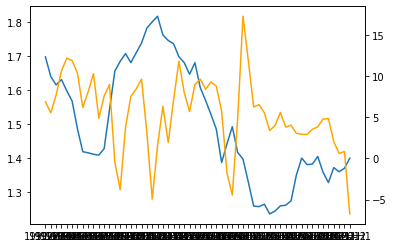

In [3]:

merged = pd.merge(exchange_rate, gdp, on='half_year')
exc_growth = calc_exchange_rate_growth(merged['exchange_rate'].values)
merged['exc_growth'] = exc_growth
merged = merged.dropna()
print(merged.corr())

fig, ax = plt.subplots()
ax.plot(merged['exchange_rate'])
ax2 = ax.twinx()
ax2.plot(merged['GDP'], color='orange')
plt.show()

In [7]:
exc_growth

array([        nan, -3.21915028, -3.40719675, -1.51210136,  0.96809782,
       -2.02701289, -1.89632983, -5.23661785, -4.53119861, -0.23393122,
       -0.3005604 , -0.17780449,  1.35788312,  8.01975008,  7.42061522,
        1.7249796 ,  1.36707795, -1.55968855,  1.72384214,  1.68409943,
        2.53055761,  1.03274716,  0.92445761, -3.0438594 , -0.9132464 ,
       -0.55028974, -2.21330392, -1.03404988, -2.01677651,  2.06033935,
       -4.3730661 , -2.36843861, -2.6167644 , -2.83273218, -6.64642737,
        3.96849403,  3.52209467, -5.1019767 , -1.37131038, -4.8786177 ,
       -5.3204497 , -0.13898504,  0.57896009, -2.27258672,  0.69227171,
        1.22181976,  0.15093001,  1.03416807,  5.99914655,  3.68671316,
       -1.38309726,  0.11987814,  1.6277956 , -3.3355869 , -2.22216146,
        3.3253562 , -0.88793943,  0.75213867,  2.14463562])

In [10]:
merged.to_csv('data/EXR_GDP_EXRgrowth.csv')